# Notebook activity A1.4 A time series dataset

In this notebook activity you will study the `importExport` dataset (described in Unit A1, Section 3.2.3), which contains data on imports and exports for the UK economy. In contrast to the cross-sectional data of the previous notebook (Notebook activity A1.3), the UK economy is the only cross-sectional unit and it is observed at several points in time, this is why a dataset such as this one is called a time series dataset.

As seen in Notebook activity A1.2, this dataset can be used to estimate the propensity to import, in this case, for the UK as a whole. Time series is the subject of Unit A2, but this notebook activity will show you how to recognise and set up a dataset as a time series dataset, and will practice descriptive statistics and simple estimation. You will see in Unit A2 that only under very particular circumstances OLS is an adequate estimator in time series, but for the moment, we can use it with that pinch of salt.

As a reminder, the variables are described as:
 * `year`: the year that the observation relates to
 * `quarter`:  the quarter that the observation relates to
 * `exports`: the value of real exports, in billions of £
 * `income`:  the value of national income (as measured by GDP), in billions of £
 * `imports`: the value of real imports, in billions of £.
 
The data are stored in the `importExport` data frame. 

## (a) Getting started

### (i)

Start by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the importExport data frame
data(importExport)
# Check the data frame has loaded OK
head(importExport)

## (b) Exploring the data 

### (i)

Use the empty code cell below to create tables of the time variables, `year` and `quarter`, as well as summaries of the three main variables, `exports`, `income`, and `imports`.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [2]:
# for the time variables, since they are both numerical and discrete
table(importExport$year)
table(importExport$quarter)
# for the main variables, since they are all numerical and continuous
summary(importExport[, c("exports", "income", "imports")])


1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 
   4    4    4    4    4    4    4    4    4    4    4    4    4    4    4    4 
2011 2012 2013 2014 2015 2016 2017 2018 2019 
   4    4    4    4    4    4    4    4    4 


 1  2  3  4 
25 25 25 25 

    exports           income         imports      
 Min.   : 52.40   Min.   :207.2   Min.   : 49.22  
 1st Qu.: 70.44   1st Qu.:281.8   1st Qu.: 77.42  
 Median : 99.89   Median :381.6   Median :107.15  
 Mean   :102.28   Mean   :372.5   Mean   :108.06  
 3rd Qu.:128.95   3rd Qu.:447.6   3rd Qu.:136.82  
 Max.   :189.11   Max.   :568.9   Max.   :187.12  

### (ii)

Given your output in (i), describe the main features of the data.

#### Solution <a class="tocSkip">

The data collection started in the first quarter of 1995 and ended in the last quarter of 2019, totalling 100 observations altogether (4 observations per year, for 25 years). 

The means and the medians of all three variables are close, and are roughly in the middle between the corresponding minima and maxima. So, contrary to the variables in Notebook activity A1.3, the main variables of this dataset do not display signs of skewness worth transforming the variables. 

## (c) Plotting a time series

When analysing time series data presented with two time variables, in this case, `year`and `quarter`, it is sometimes useful to generate a data frame which combines the two time indicators. This is shown below for the variables we will be using in the analysis of the propensity to import, `imports` and `income`. 

### (i)

Run the code below to create new variables, `importTS` and `incomeTS`. Note that running the code below will not generate any visible output.

In [3]:
importTS <- ts(importExport$imports,frequency=4,start=c(1995,1))
incomeTS <- ts(importExport$income,frequency=4,start=c(1995,1))

###  <a class="tocSkip">

The `ts()` command creates a time series object from a vector of data (here: `imports` and `income`, respectively). It requires further information, including the number of observations per unit of time (here: 4 per year, given in the `frequency` option) and the time of the first observation given in `start` (here: first quarter of 1995).

We can use our new time series objects, `importTS` and `incomeTS`, to create time plots. (You will see more of these in Unit A2.)

### (ii)

Run the code below to create time plots of the new variables `importTS` and `incomeTS`.

In [ ]:
plot(importTS)
plot(incomeTS)

###  <a class="tocSkip">

We will leave the analysis of time patterns for Unit A2. However, the time patterns of time series variables often render OLS invalid as an estimator, as mentioned in the introduction to this notebook activity. You can revisit this exercise after you study Unit A2 to reflect on how you would have proceeded below.

## (d) Estimating the propensity to import

In Notebook activity A1.2, the model

> `imports` ~ `income`

was discussed. In this section, we will fit this model to the `importExport` data, and will interpret the output.

### (i) 

Use the empty code cell below to estimate the model above.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [5]:
importProp <- lm(importTS ~ incomeTS, data = importExport)
summary(importProp)


Call:
lm(formula = importTS ~ incomeTS, data = importExport)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8733  -4.0336  -0.0506   4.2316  14.9955 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -27.741193   2.395204  -11.58   <2e-16 ***
incomeTS      0.364536   0.006208   58.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.226 on 98 degrees of freedom
Multiple R-squared:  0.9724,	Adjusted R-squared:  0.9721 
F-statistic:  3448 on 1 and 98 DF,  p-value: < 2.2e-16


### (ii)

Using your output from (i), find and interpret the marginal propensity to import during the period covered by the data. 

#### Solution <a class="tocSkip">

The marginal propensity to import during this period is the coefficient on income (`incomeTS`), 0.36, meaning that on average 36% of all national income is spent on imports. The coefficient is highly significant in the model, with a tiny $p$-value.

---

###  <a class="tocSkip">

We further note that the $R^2$ value is close to one. (*You will discover in the course of Unit A2 that a high $R^2$ when data are time series is not necessarily a good thing*.)

## (e) Checking the model assumptions

In this section, we will check the model assumptions of

* mean zero
* constant variance
* normality.

### (i)

Use the empty code cell below to create the residual plot and the normal probability plot. 

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

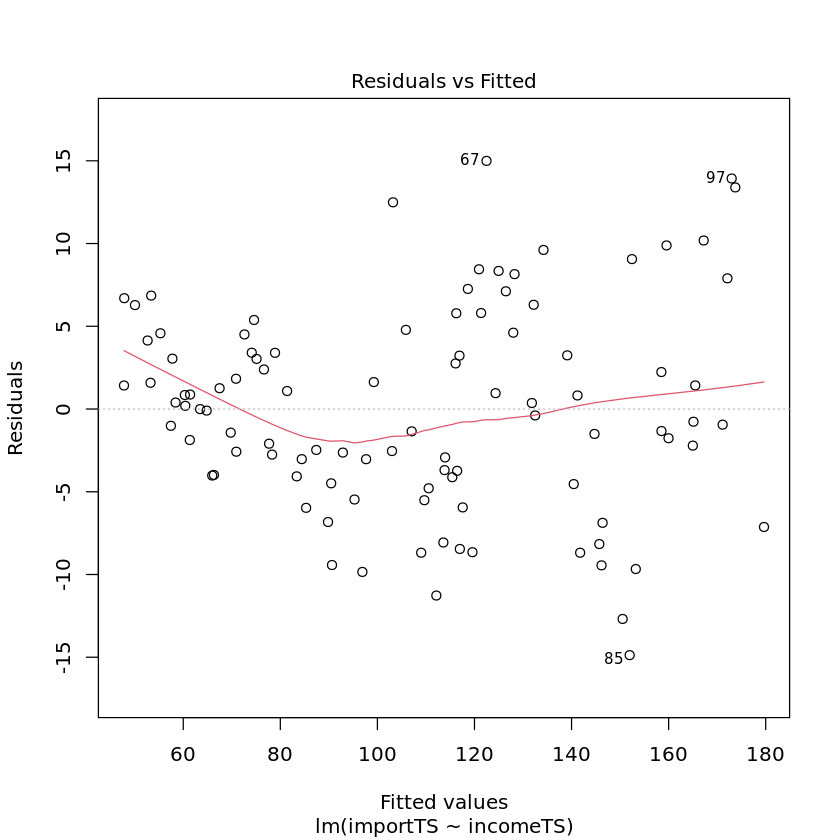

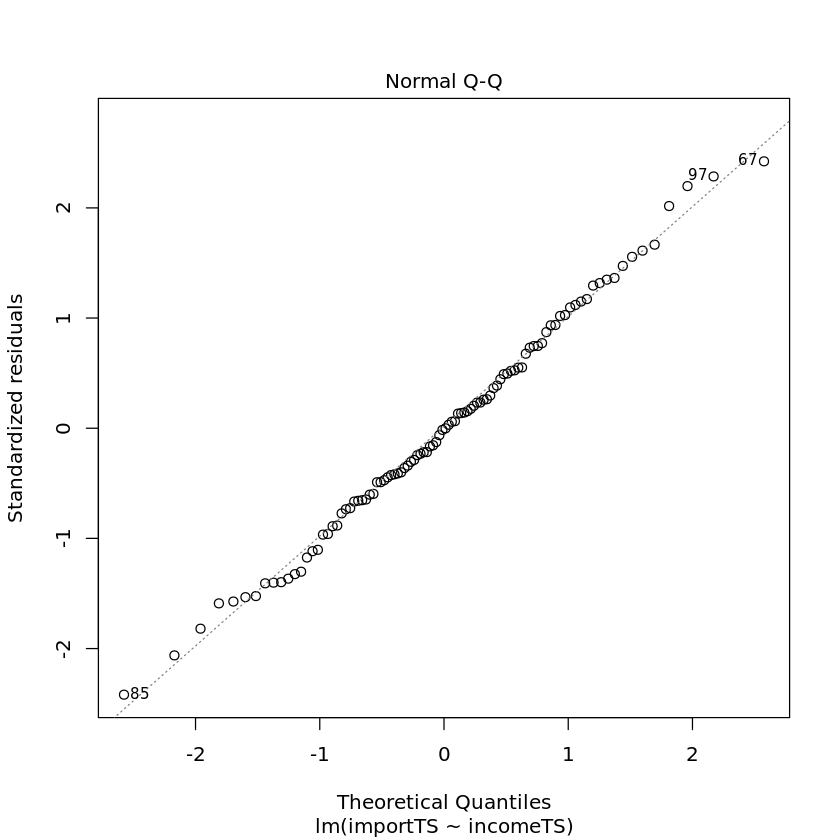

In [6]:
plot(importProp,1)
plot(importProp,2)

### (ii)

Using your output from part (i), do you think the model assumptions hold?

#### Solution <a class="tocSkip">

The red line is slightly curvy, but not to an extent that would cause severe doubts on the zero mean assumption.

The spread of the residuals around the zero line increases as the fitted values increase. The constant variance assumption does not seem to hold.

The assumption of normality appears well supported by the normal probability plot. The points are close to the straight line.